# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [50]:
!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
bus-breakdown-and-delays.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bus-breakdown-and-delays.zip
replace Bus_Breakdown_and_Delays.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Importing Libraries

In [2]:
!pip install summarytools
!pip install skimpy
from summarytools import dfSummary
from skimpy import skim

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [56]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv') #loading dataset
df.head() #Inspect the dataset

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [57]:
#by using dfSummary and skim we can shows --> Summary statistics/Check for missing values/Distribution of features/Categorical feature analysis
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,School_Year[object],1. 2016-20172. 2015-20163. 2017-20184. 2019-2020,"83,141 (56.2%)63,184 (42.7%)1,646 (1.1%)1 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACBUlEQVR4nO3cwY3aUBSG0WsLTcLGCCFRQrKjAIpIsSmCAlimB4TwIkxmQxaDwkjZ5v1GzjkVXNAH5lm+dLfbrSChn3oA/h9iI6arqmVVvUw9yEy93W6369RDPIvFZrP5NgzDeupB5mgcx3PXdd8F924xDMN6v99fV6vV69TDzMnlcvl8OBzWp9PpparEVlWLqqrVavW63W5/Tj3MDC2nHuCZOCAQIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzGLqvfHYaYeZG68p39bjON4PhwO6/I4zD83juO5qt6mnuNZeCy8LY+Ff9BZ5SPFAYEYl9EHl7zGbFfd2YRqz3ZV2YRKsV314NZPYw4IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2Iixyldef4pVvjtrd+3ZQXiwg9CYVT5iPn6z+WTT1J/tKttFtNYPw7De7XZ1X+fz241m+qqq5XL5a+pBmD83dYkRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLER01dVXa/XT1MPwvz14ziej8ej7SKas4NAjO0qYhwQiOm7rvvadZ2/H6C5vqq+VJXTKM25jBIjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI2Yvqp+VJV/C6c5Cy/EuIwSIzZifgPObZmOjWOeuQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Busbreakdown_ID[int64],Mean (sd) : 1287778.9 (43243.4)min < med < max:1212681.0 < 1287843.5 < 1362605.0IQR (CV) : 74753.5 (29.8),"147,972 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACM0lEQVR4nO3XO4/aQBSG4TOwQcMltrgEOpqU6SzR0KRLmR+7bXqQtqZIk4oGISFjhLMoiDgVZQj2JOt82vdp4XjM8YsErigKA/53jbpvALjHQ9038K8459pm1gq4RMPMforNmpn9KIriOWC+ssCd37zvP4YaeHjo0qvO+8Fg8CmO426VQy+Xy5s8z9/3er1vjUbjrDB7td/vj865L2Z2qjAe8ryCdn44HFLn3OPvYr0ZqnOuPRwOP0dR1C97cOjSQ+bP57M3sw+z2expNBodyp69Xq/7q9XqXZIkXyeTSaowa2a22WzeLpfLj9PpdNRsNkuFGvq8QnaeZZlfLBb93W7XMrPyoZpZK4qi/nw+f47juNQHD136X3jgHe/9eTwefy97dpqmbTOzbrd7Kjtf1+x13nvfSZLk9NJfktCdm1n71ot3/UaN47iWpVedv86+VnV9ScrOlMG/fkggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEh4uOdNWZb5shc+Ho/ezCzPc7/dbjsvOa96tup9h87f09cvQ+cyuxRcbsYAAAAASUVORK5CYII="">",0(0.0%)
3,Run_Type[object],1. Special Ed AM Run2. Pre-K/EI3. Special Ed PM Run4. General Ed AM Run5. General Ed PM Run6. Special Ed Field Trip7. General Ed Field Trip8. Project Read PM Run9. nan10. Project Read AM Run11. other,"85,990 (58.1%)20,951 (14.2%)17,672 (11.9%)17,182 (11.6%)4,541 (3.1%)628 (0.4%)570 (0.4%)300 (0.2%)89 (0.1%)47 (0.0%)2 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD+0lEQVR4nO3dwW0bVwBF0T8C4cQbEgQBlZD0oCJcbIpgEe5BEMSF7XjDLOwsbFOSFzN3APKcCj6E6/kmMU+azufzgMLd2gfgdoiNjNjIiI2M2MiIjYzYyIiNjNjITGOM92OMd2sf5AZ8PZ/Pn9c+xJo2h8Phw3a73a99kGt3Op2epmn655aD22y32/3Dw8Pn3W73Ze3DXKvn5+c/j8fj/vHx8d0Y43ZjG2OM3W735f7+/tPah7ly79c+wNp8QCAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjKbMb69b7X2Qa6Zn+83m9Pp9HQ8HvfD+1aLOp1OT2OMr2ufY002CJ2b3yBMfmUWlSWfbDf/L5kfLbausibiZ4usq6yJuGTJdZVPt/zAl7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkFhm8GHhwyWKDFwMPfua1cDIGL2TmfrJ5mvGiWQcvRi68ZrbBi5ELb5l78GLkwot8qUtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZmtsGLkQtvmXXwYuTCa7wWTsbghYwPCGTmvEZdobxqtnWVZRVvmWVdZVnF75hzXWVZxat8QCAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMzy7rKsorfMdu6yrKKt3gtnIx1FZmXnmyeUszu4uDFeIUl/DJ4MV5hKS8NXoxXmJ0vdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Mj8MngxXmEpFwcvxisswWvhZAxeyPz/ZBueZCxtczgcPowxhoELS7vbbrf77+uquf4MJFzkezYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7P5vqQaw5qKhdkgkLGuIuPJRsa6iox1FRlffZARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IeO1cDIGL2T8n43M3TRNf0/T5G+Msri7McZfY4w/1j4I1881SkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5m6M8XGM8e/aB+H62SCQcY2SERsZsZGxriJjXUXGNUpGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1

In [58]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 147972 │ │ string      │ 19    │                                                          │
│ │ Number of columns │ 21     │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name       ┃ NA ┃ NA % ┃ mean    ┃ sd    ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Busbreakdown_ID   │  0 │    0 │ 1288000 │ 43240 │ 1213000 │ 1250000 │ 1288000 │ 1325000 │ 1363000 │ ▇▇▇▇▇▇ │  │
│ │ Number_Of_Student │  0 │    0 │    3.59 │ 55.37 │       0 │       0 │       0 │       4 │    9007 │   ▇    │  │
│ │ s_On_The_Bus      │    │      │         │       │         │         │         │         │         │        │  │
│ └───────────────────┴────┴──────┴─────────┴───────┴─────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA          ┃ NA %      ┃ words per row          ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ School_Year                        │           0 │         0 │                      1 │             147972 │  │
│ │ Run_Type                           │          89 │      0.06 │                    3.6 │             528679 │  │
│ │ Bus_No                             │           0 │         0 │                      1 │             149202 │  │
│ │ Route_Number                       │          88 │      0.06 │                      1 │             148558 │  │
│ │ Reason                             │         102 │      0.07 │                    1.9 │             284545 │  │
│ │ Schools_Serviced                   │           0 │         0 │                      1 │             150245 │  │
│ │ Occurred_On                        │           0 │         0 │                      3 │             443916 │  │
│ │ Created_On                         │           0 │         0 │                      3 │             443916 │  │
│ │ Boro                               │        6318 │      4.27 │                      1 │             152200 │  │
│ │ Bus_Company_Name                   │           0 │         0 │                    3.8 │             555452 │  │
│ │ How_Long_Delayed                   │       21630 │     14.62 │                    1.4 │             210879 │  │
│ │ Has_Contractor_Notified_Schools    │           0 │         0 │                      1 │             147972 │  │
│ │ Has_Contractor_Notified_Parents    │           0 │         0 │                      1 │             147972 │  │
│ │ Have_You_Alerted_OPT               │           0 │         0 │                      1 │             147972 │  │
│ │ Informed_On                        │           0 │  

In [59]:
# we can see from the data that we do not need Busbreakdown_ID so i will drop it
df.drop(columns='Busbreakdown_ID' , axis=1 , inplace=True)

<Axes: >

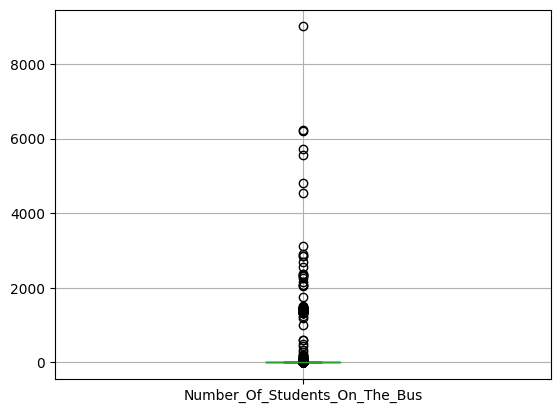

In [60]:
#finding outliers
df.boxplot()

#we only have 1 numrical column whish is (Number_of_studetn_on_the_bus) and i do not think we need to remove outliers from it

In [ ]:
#the function to removing outliers
def remove_outliers(df,col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  df = df[(df[col] >= lower) & (df[col] <= upper)]
  return df

In [ ]:
# i will do the Correlation matrix after encoding

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [61]:
# checking Missing Values
df.isnull().sum()

,0
School_Year,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318
Bus_Company_Name,0


In [62]:
#handling missing values

# 1) Incident_Number have 142340 null values from 147972 rows so i think we need to drop it instead of trying to impute it
df.drop(columns=['Incident_Number'], axis=1, inplace=True)

# 2) since we have 147972 rows its okey to drop null rows if they are few
# Run_Type -> 89
# Route_Number -> 88
# Reason -> 102
df.dropna(subset=['Run_Type', 'Route_Number', 'Reason'], inplace=True)

# 3) Boro has 6318 which is large so im going to fill it with median
df['Boro'].fillna(df['Boro'].mode()[0], inplace=True)

# 4) how_long_delayed has 21630 which is also quit large so im gonna fill it with median
df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode()[0], inplace=True)

In [64]:
#encoding

#label
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
feature_cat = df.select_dtypes(include=('object')).columns
for col in feature_cat:
    df[col] = la.fit_transform(df[col])

<Axes: >

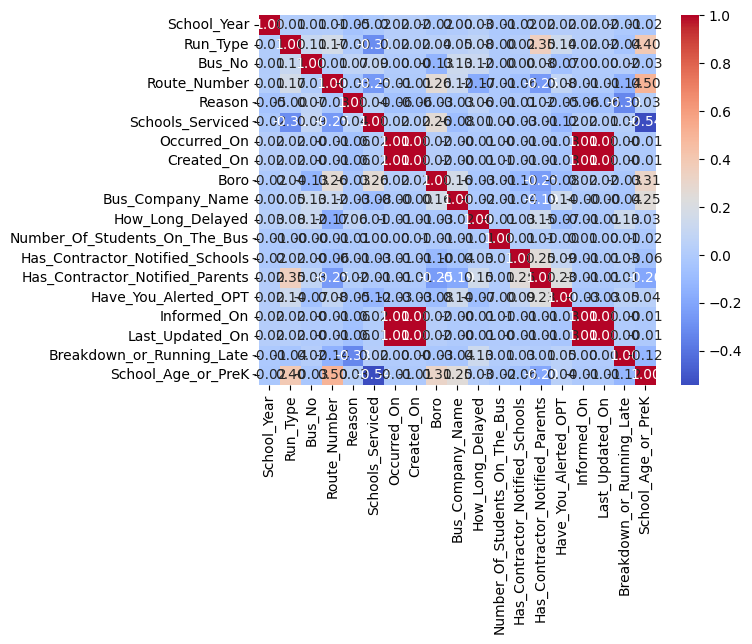

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# we can not understand anything from it but i did it

In [66]:
# for scaling and Normalizing Data im going to scale after i split data to avoid data leakage

In [67]:
# Feature Engineering
# im not going to create any new feature what we have is good enough

In [68]:
#handling imbalanced after spliting to also avoid data leakage

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [69]:
#spliting into x , y
X= df.drop(columns='Breakdown_or_Running_Late' , axis=1)
y = df['Breakdown_or_Running_Late']

In [72]:
#displying y to check if theres imblance
y.value_counts()

,count
Breakdown_or_Running_Late,
1,130618
0,17075


In [74]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

# Perform SMOTE since there is an imbalance
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Splitting the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Normalizing the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [77]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=64, input_shape=(X_train.shape[1],), activation='relu'))  # Input layer

model.add(Dense(units=32, activation='relu'))  # Hidden layer 1
model.add(Dense(units=16, activation='relu'))  # Hidden layer 2

model.add(Dense(units=1, activation='sigmoid'))  # Output layer

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,841 (15.00 KB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [82]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Training the Model
Train the ANN model using the training data.

In [86]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
5715/5715 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9724 - loss: 0.0828 - val_accuracy: 0.9750 - val_loss: 0.0760
Epoch 2/10
5715/5715 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9735 - loss: 0.0789 - val_accuracy: 0.9746 - val_loss: 0.0825
Epoch 3/10
5715/5715 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9751 - loss: 0.0744 - val_accuracy: 0.9764 - val_loss: 0.0731
Epoch 4/10
5715/5715 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9754 - loss: 0.0730 - val_accuracy: 0.9771 - val_loss: 0.0706
Epoch 5/10
5715/5715 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9755 - loss: 0.0727 - val_accuracy: 0.9768 - val_loss: 0.0733
Epoch 6/10
5715/5715 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9757 - loss: 0.0711 - val_accuracy: 0.9769 - val_loss: 0.0715
Epoch 7/10
5715/5715 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.9766 - loss: 0.0698 - val_accuracy: 0.9769 - val_loss: 0.0732
Epoch 8/10
5715/5715 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.9770 - loss: 0

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [88]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9775 - loss: 0.0693
Test Accuracy: 0.9783


the training accuracy is 0.9768 and testing accuracy 0.9775 so the model performed good no signs of overrfitting

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [89]:
# Make Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

1225/1225 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

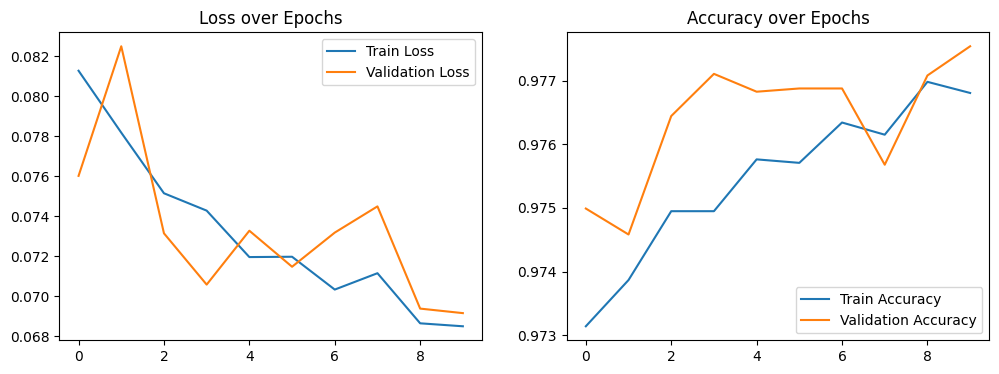

In [90]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

## Save the Model
Save the trained model for submission.

In [91]:
# Save the model
model.save('ANN_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

**Data Preprocessing:**

Normalization: I used Min-Max scaling to ensure that all features are within the same range, also i used it because we do not have normal distribution.

Encoding: Label encodingto convert categorical into numerical format, making them suitable for the ANN model.

**Model Architecture:**

Layers and Neurons: input layer with 64 neurons, two hidden layers with 32 and 16 neurons , and an output layer with 1 neuron. i choosed this after trying many things and in my opinoin its the best

Activation Functions: relu was used to interduce non linears and i used sigmoid to because it produce 0,1 output

**Training Process:**
Batch Size: A batch size of 32 was chosen because after many times of trying i think its the best

Epochs: I trained the model for 10 epochs to allow learning without overfitting.

Optimizer: The Adam optimizer was selected

**Loss Function and Metrics:**

Loss Function: I used binary_crossentropy because we have binary classifaction

Metrics: i choosed accuracy to measure how often the model correctly predicts the outcome/output/result, which is good for classification tasks.


**Regularization Techniques:**
No regularization used since the model did not show signs of overfitting. but in the feuter we can import the model and implemented if the model starts to overfit.


**Model Evaluation:**
Evaluation Metrics:  i choosed accuracy to evaluate how often the model correctly predicts the outcome/output/result, which is good for classification tasks.

**Model Tuning (If Done):**
No Hyperparameter Tuning Performed: In this case, no extensive hyperparameter tuning was performed due to time constraints. However, tuning could further improve the model’s performance


**Overfitting and Underfitting:**
No Overfitting Detected: The model showed a good balance between training and validation accuracy, indicating no significant overfitting or underfitting. If overfitting had occurred, I would consider adding dropout layers or reducing the model complexity. If underfitting was observed, increasing the number of neurons or layers could help.